## **<font color=crimson> Deepak_Kishore_Tanuku_Mini_Project_4**

**<font color=crimson> Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
#!pip install pmdarima
from pmdarima.arima import auto_arima

import warnings
warnings.filterwarnings('ignore')

**<font color=crimson> Reading Data**

In [2]:
df = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**<font color=crimson> Columns Datatypes**

In [3]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

**<font color=crimson> Dataset Info**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

**<font color=crimson> Structure of Dataset**

In [5]:
df.shape

(9994, 21)

**<font color=crimson> Checking for Null Values**

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**<font color=crimson> Sorting the Data based on Order Date**

In [7]:
df.sort_values(by='Order Date', inplace=True)

**<font color=crimson> Dataset Head()**

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7980,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
741,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
1759,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


## **<font color=crimson> Exploratory Data Analysis - EDA**

**<font color=crimson> Year wise Sales**

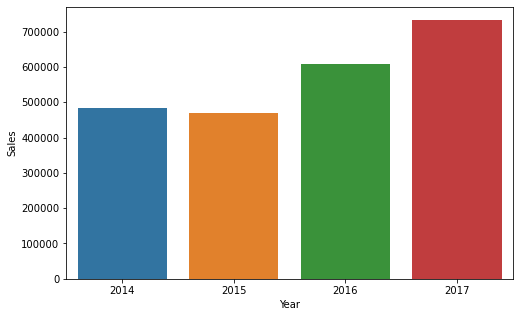

In [9]:
df['Year'] = df['Order Date'].dt.year

plt.figure(figsize=(8,5))
sb.barplot(x='Year',y='Sales',ci=0,estimator=sum,data=df)
plt.show()

* Sales are increasing over the year. Sales we least in the year 2015 whereas 2017 had the highest sales.

**<font color=crimson> Comaprision of Sales with Subcategory**

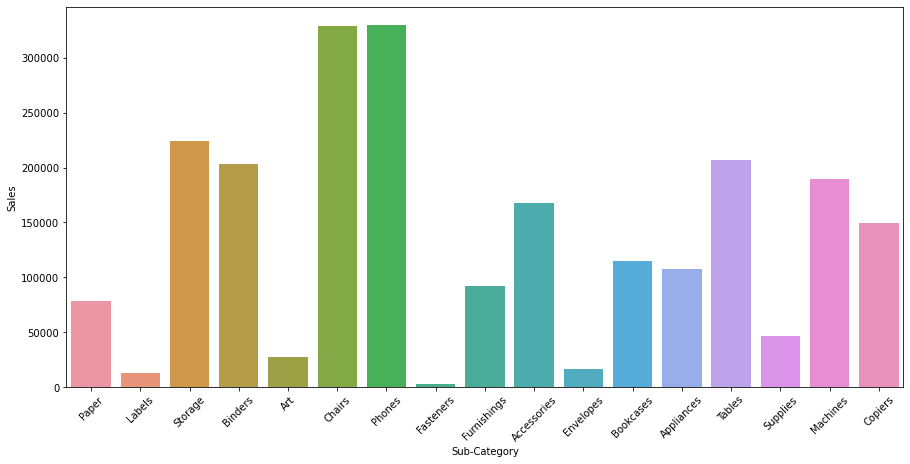

In [10]:
plt.figure(figsize=(15,7))
sb.barplot(x='Sub-Category',y='Sales',estimator=sum,data=df,ci=0)
plt.xticks(rotation=45)
plt.show()

**<font color=crimson> Comaprision of Sales with Various Features**

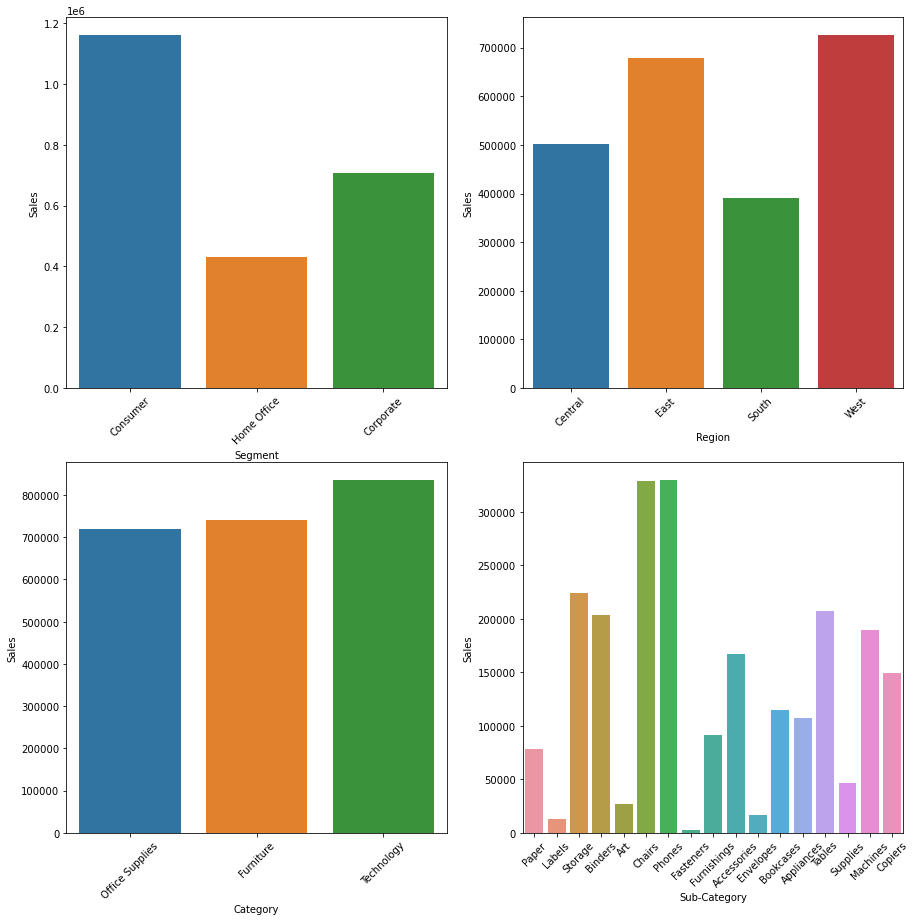

In [11]:
cols = ['Segment','Region','Category','Sub-Category']
plt.figure(figsize=(15,15))
for i in enumerate(cols):
    plt.subplot(2,2,i[0]+1)
    sb.barplot(x=i[1],y='Sales',estimator=sum,data=df,ci=0)
    plt.xticks(rotation=45)

* Consumer segment has more sales compared to other segments where as Home Office segment has least sales.
* South Region has the least sales and the West region has the highest sales compared to all regions.
* Technology category has more sales and office supplies have the least sales.
* Subcategories that have the highest sales are Chairs and Phones whereas Fasteners have the least sales.

**<font color=crimson> Orders and Shipment Mode**

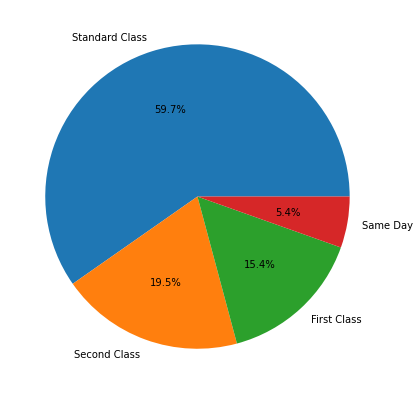

In [12]:
x = df['Ship Mode'].value_counts(normalize=True)
plt.figure(figsize=(7,7))
plt.pie(x,labels=x.index,autopct='%1.1f%%')
plt.show()

* Orders which were shipped Standard Class was the highest and Same day shipping has the Least.


**<font color=crimson> Analysis of Profit and Sales**

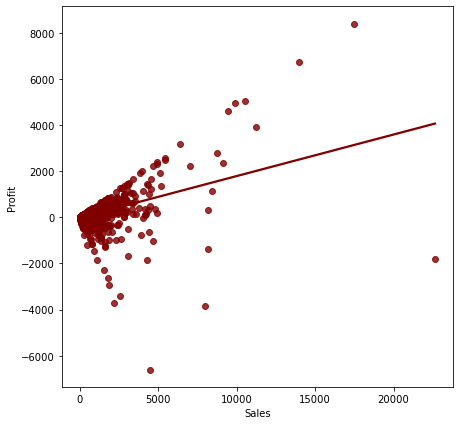

In [13]:
plt.figure(figsize=(7,7))
sb.regplot(x='Sales',y='Profit',ci=0,marker='o',color='maroon',data=df)
plt.show()

* There is a positive trend between Sales and Profit. Profits are increasing with Sales in majority of cases.


**<font color=crimson> Sales Distribution**

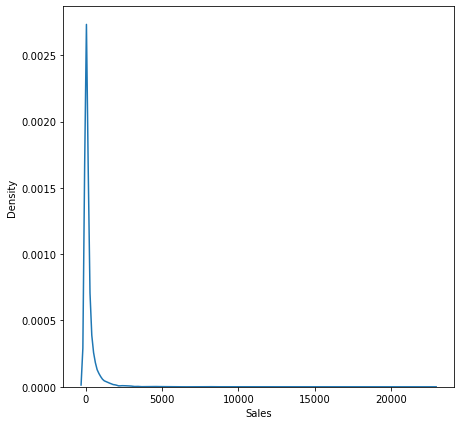

In [14]:
plt.figure(figsize=(7,7))
sb.kdeplot(x='Sales',data=df)
plt.show()

**<font color=crimson> Setting Order Date as Index**

In [15]:
df = df.set_index('Order Date')

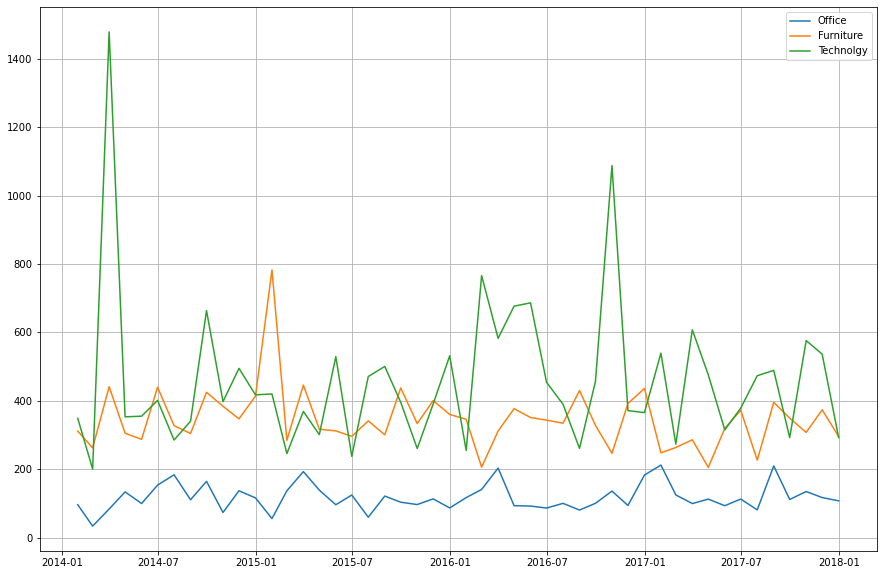

In [16]:
re_office_data = df.loc[df['Category']=='Office Supplies',:].resample('M').mean()
re_furniture_data = df.loc[df['Category']=='Furniture',:].resample('M').mean()
re_tech_data = df.loc[df['Category']=='Technology',:].resample('M').mean()

plt.figure(figsize=(15,10))
plt.plot(re_office_data['Sales'],label='Office')
plt.plot(re_furniture_data['Sales'],label='Furniture')
plt.plot(re_tech_data['Sales'],label='Technolgy')
plt.legend()
plt.grid()

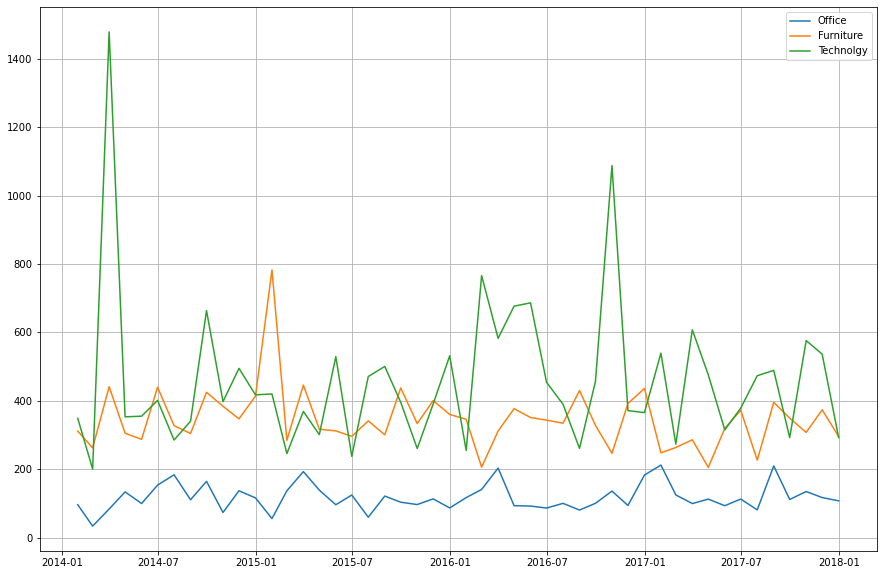

In [17]:
re_office_data = df.loc[df['Category']=='Office Supplies',:].resample('M').mean()
re_furniture_data = df.loc[df['Category']=='Furniture',:].resample('M').mean()
re_tech_data = df.loc[df['Category']=='Technology',:].resample('M').mean()

plt.figure(figsize=(15,10))
plt.plot(re_office_data['Sales'],label='Office')
plt.plot(re_furniture_data['Sales'],label='Furniture')
plt.plot(re_tech_data['Sales'],label='Technolgy')
plt.legend()
plt.grid()

In [18]:
df['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

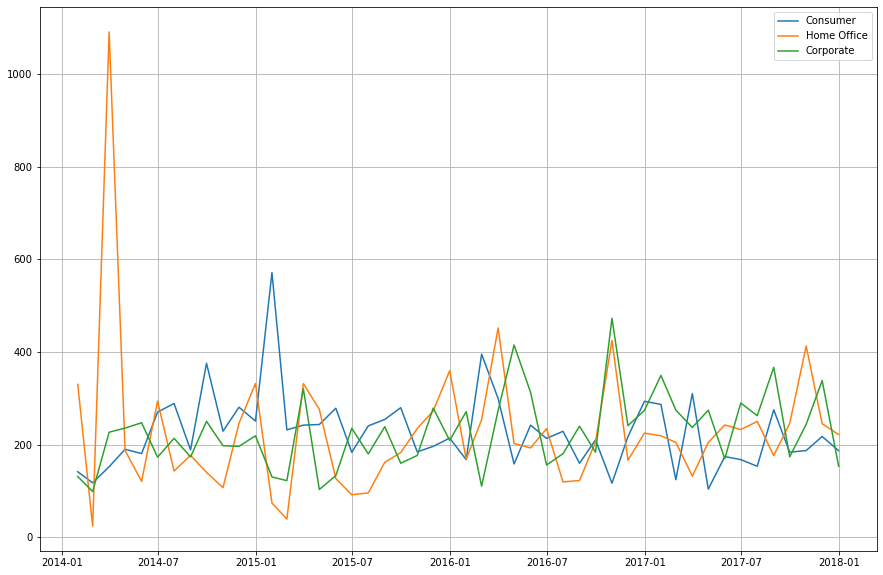

In [19]:
re_con_data = df.loc[df['Segment']=='Consumer',:].resample('M').mean()
re_ho_data = df.loc[df['Segment']=='Home Office',:].resample('M').mean()
re_corp_data = df.loc[df['Segment']=='Corporate',:].resample('M').mean()

plt.figure(figsize=(15,10))
plt.plot(re_con_data['Sales'],label='Consumer')
plt.plot(re_ho_data['Sales'],label='Home Office')
plt.plot(re_corp_data['Sales'],label='Corporate')
plt.legend()
plt.grid()

**<font color=crimson> Grouping Data Based on Order Date**

In [20]:
data = pd.DataFrame(df.groupby(by='Order Date').sum())

data.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Year
Order Date,,,,,,,
2014-01-03,7981,77095,16.448,2,0.2,5.5512,2014
2014-01-04,2223,181620,288.060,8,1.2,-65.9901,6042
2014-01-05,1760,19143,19.536,3,0.2,4.8840,2014
2014-01-06,64855,417594,4407.100,30,0.0,1358.0524,18126
2014-01-07,15323,154680,87.158,10,1.4,-71.9621,4028


**<font color=crimson> Dropping Columns**

In [21]:
data.drop(columns=['Row ID','Postal Code','Year'],inplace=True)

**<font color=crimson> Decomposing Data**

In [22]:
decomp = seasonal_decompose(data['Sales'],period=30)

**<font color=crimson> Trend, Seasonality and Irregularity**

In [23]:
trend = decomp.trend
season = decomp.seasonal
irregular = decomp.resid

**<font color=crimson> Decomposing Components Plots**

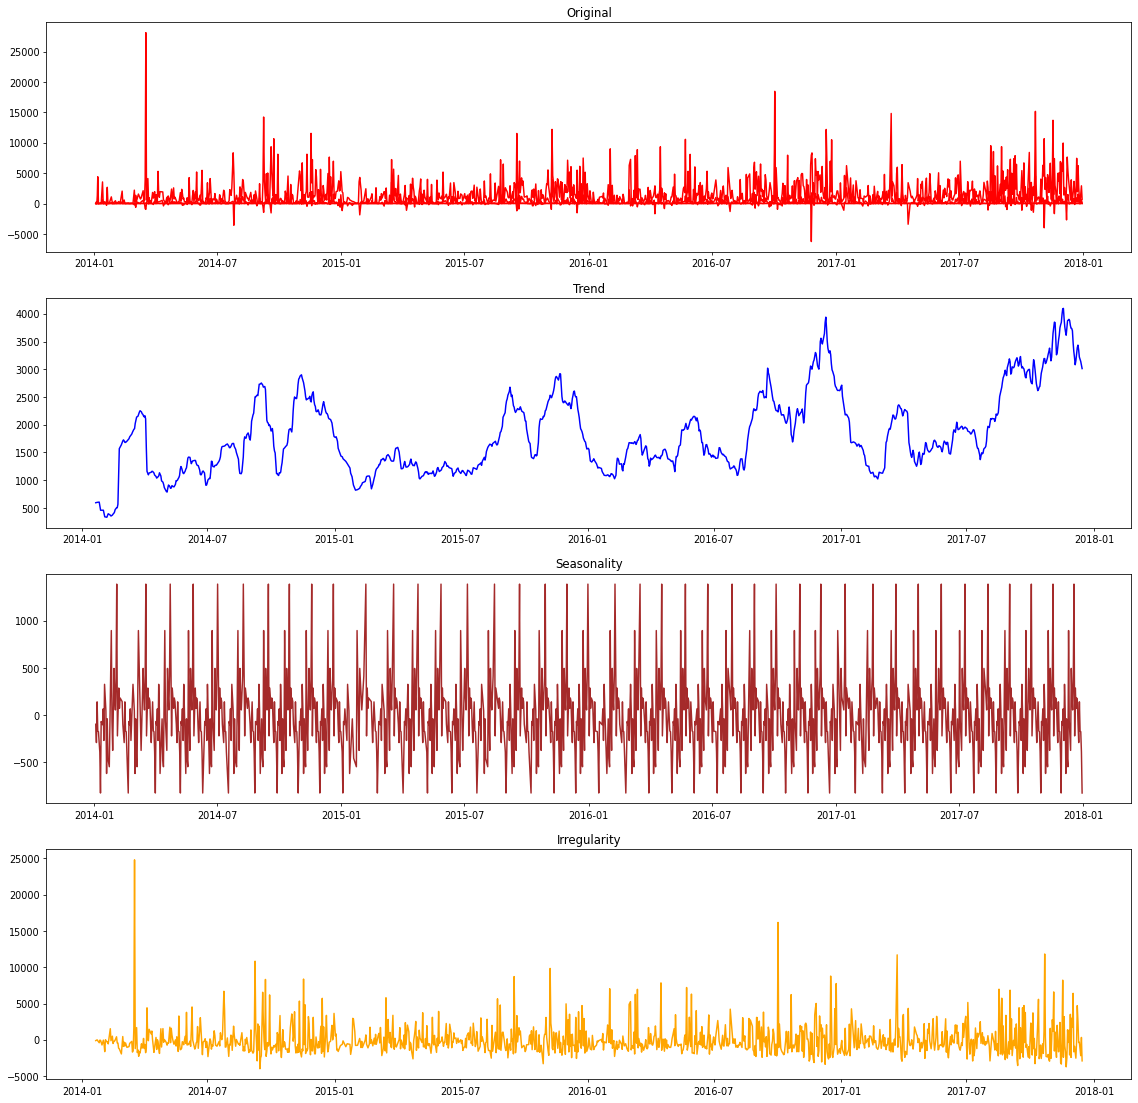

In [24]:
plt.figure(figsize=(20,20),dpi=70)
plt.subplot(4,1,1)
plt.plot(data,c='red')
plt.title('Original')

plt.subplot(4,1,2)
plt.plot(trend,c='blue')
plt.title('Trend')

plt.subplot(4,1,3)
plt.plot(season,c='brown')
plt.title('Seasonality')

plt.subplot(4,1,4)
plt.plot(irregular,c='orange')
plt.title('Irregularity')
plt.show()

* Based on the Graph we can observe that there is a Trend.
* There is a spike of sales at Starting of every month.
* So we can say that the Dataset contains Trend and Seasonality Components.

**<font color=crimson> Resampling Data Week-wise**

In [25]:
resampled_data = data.resample('W').mean()
resampled_data.shape

(209, 4)

**<font color=crimson> Defining Model for Stationarity**

In [26]:
def stationarity_check(data):
    p_value = adfuller(data)[1]
    if p_value < 0.05:
        msg = 'Data is Stationary - Proceed for Model Building'
    else:
        msg = 'Data is not Stationary'
    return(msg)

**<font color=crimson> Stationary Check**

In [27]:
stationarity_check(resampled_data["Sales"])

'Data is Stationary - Proceed for Model Building'

**<font color=crimson> ACF and PACF Plots**

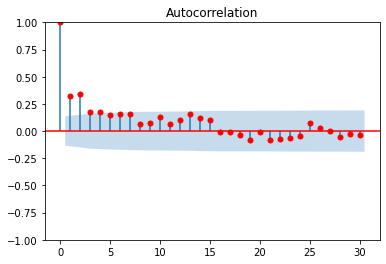

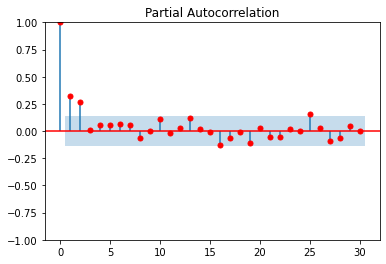

In [28]:
plot_acf(resampled_data["Sales"],lags=30,c='red');
plot_pacf(resampled_data["Sales"],lags=30,c='red');

Based on ACF and PACF plots:
* p - 3
* q - 4

**<font color=crimson> Splitting of Data**

In [29]:
limit = int(len(resampled_data)*0.75)

train = resampled_data[:limit]
test = resampled_data[limit:]

print('Shape of Train Data: ',train.shape)
print('Shape of Test Data: ',test.shape)

Shape of Train Data:  (156, 4)
Shape of Test Data:  (53, 4)


**<font color=crimson> Defining Model for AIC, BIC and ERRORS**

In [30]:
def error_check(forecast):
    mse = round(mean_squared_error(test["Sales"],forecast),3)
    rmse = round(mean_squared_error(test["Sales"],forecast,squared=False),3)
    mae = round(mean_absolute_error(test["Sales"],forecast),3)
    mape = round(mean_absolute_percentage_error(test["Sales"],forecast),3)
    return(mse,rmse,mae,mape)

def print_error(m1_mse, m1_rmse, m1_mae, m1_mape, Model):
    print('Mean Squared Error of '+Model+' is: ',m1_mse)
    print('Root Mean Squared Error of '+Model+' is: ',m1_rmse)
    print('Mean Absolute Error of '+Model+' is: ',m1_mae)
    print('Mean Absolute Percentage Error of '+Model+' is: ',m1_mape)
    
def aic_bic_scores(model):
    AIC = round(model.aic,3)
    BIC = round(model.bic,3)
    return(AIC,BIC)

def print_aic_bic(AIC, BIC, Model):
    print('AIC Score '+Model+' is: ',AIC)
    print('BIC Score '+Model+' is: ',BIC)

## **<font color=crimson> Exponential Smoothing**

**<font color=crimson> Model Building**

In [31]:
alpha = 0.4
beta = 0.5
gamma = 0.4

model_1 = ExponentialSmoothing(train["Sales"], trend='additive',seasonal='additive',seasonal_periods = 30).fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)

**<font color=crimson> Data Forecast**

In [32]:
m1_forecast = model_1.forecast(len(test["Sales"]))

**<font color=crimson> AIC-BIC Scores**

In [33]:
m1_aic, m1_bic = aic_bic_scores(model_1)

print_aic_bic(m1_aic, m1_bic, 'Exponential Smoothing')

AIC Score Exponential Smoothing is:  2299.774
BIC Score Exponential Smoothing is:  2403.469


**<font color=crimson> Checking Errors**

In [34]:
m1_mse, m1_rmse, m1_mae, m1_mape = error_check(m1_forecast)

print_error(m1_mse, m1_rmse, m1_mae, m1_mape,'Exponential_Smoothing')

Mean Squared Error of Exponential_Smoothing is:  4010583.291
Root Mean Squared Error of Exponential_Smoothing is:  2002.644
Mean Absolute Error of Exponential_Smoothing is:  1690.063
Mean Absolute Percentage Error of Exponential_Smoothing is:  0.951


**<font color=crimson> Plotting Data**

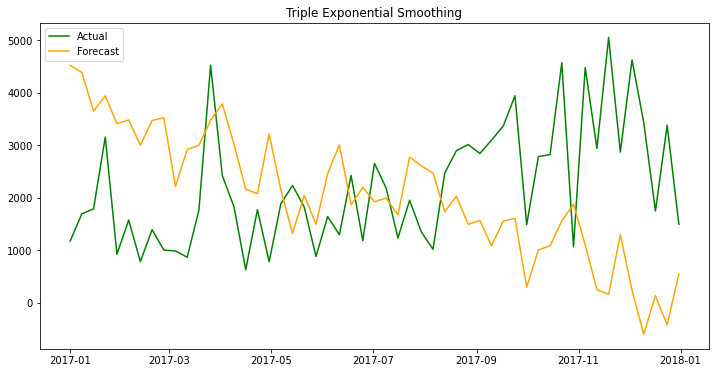

In [35]:
plt.figure(figsize=(12,6))
plt.plot(test["Sales"],label='Actual',c='green')
plt.plot(m1_forecast,label='Forecast',c='orange')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()

In [36]:
# m1_mse, m1_rmse, m1_mae, m1_mape = error_check(model_1.predict(len(train),len(train)+len(test)-1))

# print_error(m1_mse, m1_rmse, m1_mae, m1_mape,'Exponential_Smoothing')

## **<font color=crimson> ARMA**

**<font color=crimson> Defining Functions for Selecting Best Parameters for Model**

In [37]:
def order_iter(p,q):
    lst = []
    for i in range(p+1):
        for j in range(q+1):
            lst.append((i,0,j))
    return(lst)

In [38]:
def score_cal_1(lst):
    AIC = []
    BIC = []
    MSE = []
    RMSE = []
    for i in lst:
        model = ARIMA(train["Sales"],order=i).fit()
        pred = model.fittedvalues
        AIC.append(model.aic)
        BIC.append(model.bic)
        MSE.append(round(mean_squared_error(train["Sales"],pred),3))
        RMSE.append(round(mean_squared_error(train["Sales"],pred,squared=False),3))
    c = pd.DataFrame({'AIC':AIC,'BIC':BIC,'MSE':MSE,'RMSE':RMSE},index=lst)
    print('Min AIC Order: ',c['AIC'].idxmin())
    print('Min BIC Order: ',c['BIC'].idxmin())
    print('Min MSE Order: ',c['MSE'].idxmin())
    print('Min RMSE Order: ',c['RMSE'].idxmin())

**<font color=crimson> Defining Function for LJung-Box Test**

In [39]:
def fit_check(model):
    pvalue = sm.stats.acorr_ljungbox(model.resid,lags=[12],return_df=True)['lb_pvalue'].values
    if pvalue < 0.05:
        print("Bad model - Build the Model Again with differnt Parameters")
    else:
        print("Good model - Proceed for Forecasting")

**<font color=crimson> Checking for Best Parameters**

In [40]:
score_cal_1(order_iter(3,4))

Min AIC Order:  (3, 0, 3)
Min BIC Order:  (2, 0, 0)
Min MSE Order:  (3, 0, 4)
Min RMSE Order:  (3, 0, 4)


**<font color=crimson> Checking for the Best p and q using Auto Arima**

In [41]:
m = auto_arima(train['Sales'],start_p=0,max_p=3, start_q=0,max_q=4, seasonal=False, trace=True)
print(m)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2656.532, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2617.710, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2591.318, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2654.584, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2591.469, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2591.930, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2595.035, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2590.611, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2591.051, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2591.424, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2615.844, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2594.749, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.291 seconds
 ARIMA(0,1,1)(0,0,0)[0]          


**<font color=crimson> Model Building**

In [42]:
model_2 = ARIMA(train["Sales"],order=(3, 0, 4)).fit()

**<font color=crimson> LJung Box Test**

In [43]:
fit_check(model_2)

Good model - Proceed for Forecasting


**<font color=crimson> Model Summary**

In [44]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  156
Model:                 ARIMA(3, 0, 4)   Log Likelihood               -1293.658
Date:                Mon, 14 Nov 2022   AIC                           2605.316
Time:                        17:28:30   BIC                           2632.765
Sample:                    01-05-2014   HQIC                          2616.465
                         - 12-25-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1643.0444    258.766      6.350      0.000    1135.872    2150.217
ar.L1          0.8515      0.162      5.247      0.000       0.533       1.170
ar.L2         -0.7385      0.129     -5.743      0.000      -0.990      -0.486
ar.L3          0.7356      0.117      6.306      0.000       0.507       0.964
ma.L1         -0.6139      0.166     -3.694      0.000      -0.940      -0.288
ma.L2          0.8457      0.162      5.205      0.000       0.527       1.164
ma.L3         -0.6746      0.148     -4.553      0.000      -0.965      -0.384
ma.L4         -0.0931      0.133     -0.698      0.485      -0.355       0.168
sigma2      8.486e+05   8.92e+04      9.518      0.000    6.74e+05    1.02e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               158.17
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             1.34
Prob(H) (two-sided):                  0.20   Kurtosis:                         7.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**<font color=crimson> Data Forecast**


In [45]:
m2_forecast = model_2.forecast(len(test["Sales"]))

**<font color=crimson> AIC-BIC Scores**


In [46]:
m2_aic, m2_bic = aic_bic_scores(model_2)

print_aic_bic(m2_aic, m2_bic, 'ARIMA')

AIC Score ARIMA is:  2605.316
BIC Score ARIMA is:  2632.765


**<font color=crimson> Checking Errors**


In [47]:
m2_mse, m2_rmse, m2_mae, m2_mape = error_check(m2_forecast)

print_error(m2_mse, m2_rmse, m2_mae, m2_mape,'ARIMA')

Mean Squared Error of ARIMA is:  1699004.185
Root Mean Squared Error of ARIMA is:  1303.459
Mean Absolute Error of ARIMA is:  1030.265
Mean Absolute Percentage Error of ARIMA is:  0.536


**<font color=crimson> Plotting Data**

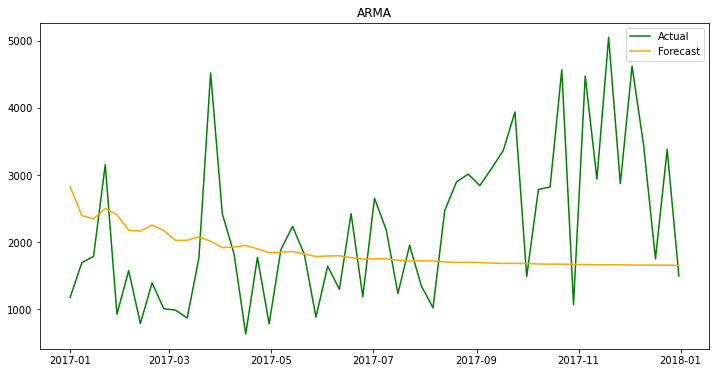

In [48]:
plt.figure(figsize=(12,6))
plt.plot(test["Sales"],label='Actual',c='green')
plt.plot(m2_forecast,label='Forecast',c='orange')
plt.title('ARMA')
plt.legend()
plt.show()

# SARIMA Model

**<font color=crimson> Defining Functions for Selecting Best Parameters for Model**

In [49]:
def score_cal_2(lst):
    ind = []
    AIC = []
    BIC = []
    MSE = []
    RMSE = []
    for i in lst:
        p,d,q=i
        model = sm.tsa.statespace.SARIMAX(train["Sales"],order=i,seasonal_order=(p,0,q,5)).fit()
        pred = model.fittedvalues
        AIC.append(model.aic)
        BIC.append(model.bic)
        MSE.append(round(mean_squared_error(train["Sales"],pred),3))
        RMSE.append(round(mean_squared_error(train["Sales"],pred,squared=False),3))
        ind.append((p,0,q,5))
    c = pd.DataFrame({'AIC':AIC,'BIC':BIC,'MSE':MSE,'RMSE':RMSE},index=ind)
    print('Min AIC Order: ',c['AIC'].idxmin())
    print('Min BIC Order: ',c['BIC'].idxmin())
    print('Min MSE Order: ',c['MSE'].idxmin())
    print('Min RMSE Order: ',c['RMSE'].idxmin())

**<font color=crimson> Checking for Best Parameters**

In [50]:
score_cal_2(order_iter(3,4))

Min AIC Order:  (1, 0, 1, 5)
Min BIC Order:  (1, 0, 1, 5)
Min MSE Order:  (3, 0, 3, 5)
Min RMSE Order:  (3, 0, 3, 5)


**<font color=crimson> Model Building**


In [51]:
model_3 = sm.tsa.statespace.SARIMAX(train["Sales"],order=(3,0,3),seasonal_order=(3, 0, 3, 5)).fit()

**<font color=crimson> LJung Box Test**


In [52]:
fit_check(model_3)

Good model - Proceed for Forecasting


**<font color=crimson> Model Summary**

In [53]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                  156
Model:             SARIMAX(3, 0, 3)x(3, 0, 3, 5)   Log Likelihood               -1294.574
Date:                           Mon, 14 Nov 2022   AIC                           2615.147
Time:                                   17:28:46   BIC                           2654.795
Sample:                               01-05-2014   HQIC                          2631.251
                                    - 12-25-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8362      0.065     28.297      0.000       1.709       1.963
ar.L2         -1.7374      0.112    -15.539      0.000      -1.956      -1.518
ar.L3          0.8995      0.074     12.236      0.000       0.755       1.044
ma.L1         -1.6214      0.067    -24.170      0.000      -1.753      -1.490
ma.L2          1.6179      0.098     16.489      0.000       1.426       1.810
ma.L3         -0.8239      0.078    -10.510      0.000      -0.978      -0.670
ar.S.L5        0.8914      1.129      0.789      0.430      -1.322       3.105
ar.S.L10       0.9462      2.064      0.458      0.647      -3.100       4.992
ar.S.L15      -0.9272      0.997     -0.930      0.353      -2.882       1.027
ma.S.L5       -0.9140      1.324     -0.690      0.490      -3.510       1.682
ma.S.L10      -0.9106      2.332     -0.390      0.696      -5.481       3.660
ma.S.L15       0.9751      1.108      0.880      0.379      -1.197       3.147
sigma2      8.823e+05   5.92e-06   1.49e+11      0.000    8.82e+05    8.82e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               247.98
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             1.55
Prob(H) (two-sided):                  0.23   Kurtosis:                         8.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.9e+27. Standard errors may be unstable.
"""

**<font color=crimson> Data Forecast**


In [54]:
m3_forecast = model_3.forecast(len(test["Sales"]))

**<font color=crimson> AIC-BIC Scores**


In [55]:
m3_aic, m3_bic = aic_bic_scores(model_3)

print_aic_bic(m3_aic, m3_bic, 'SARIMA')

AIC Score SARIMA is:  2615.147
BIC Score SARIMA is:  2654.795


**<font color=crimson> Checking Errors**


In [56]:
m3_mse, m3_rmse, m3_mae, m3_mape = error_check(m3_forecast)

print_error(m3_mse, m3_rmse, m3_mae, m3_mape,'SARIMA')

Mean Squared Error of SARIMA is:  2790206.147
Root Mean Squared Error of SARIMA is:  1670.391
Mean Absolute Error of SARIMA is:  1493.741
Mean Absolute Percentage Error of SARIMA is:  1.089


**<font color=crimson> Plotting Data**

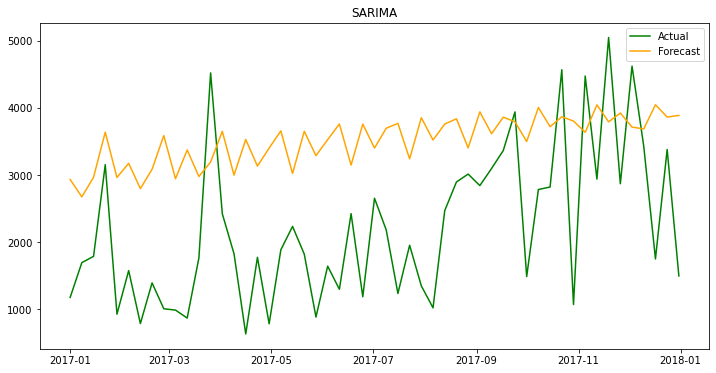

In [57]:
plt.figure(figsize=(12,6))
plt.plot(test["Sales"],label='Actual',c='green')
plt.plot(m3_forecast,label='Forecast',c='orange')
plt.title('SARIMA')
plt.legend()
plt.show()

## **<font color=crimson> SARIMAX**


**<font color=crimson> Exogenous Data**

In [58]:
exog_train = train.drop(columns=['Sales'])
exog_test = test.drop(columns=['Sales'])

**<font color=crimson> Defining Functions for Selecting Best Parameters for Model**

In [59]:
def score_cal_3(lst):
    ind = []
    AIC = []
    BIC = []
    MSE = []
    RMSE = []
    for i in lst:
        p,d,q=i
        model = sm.tsa.statespace.SARIMAX(train["Sales"],order=i,seasonal_order=(p,0,q,5),exog=exog_train).fit()
        pred = model.fittedvalues
        AIC.append(model.aic)
        BIC.append(model.bic)
        MSE.append(round(mean_squared_error(train["Sales"],pred),3))
        RMSE.append(round(mean_squared_error(train["Sales"],pred,squared=False),3))
        ind.append((p,0,q,5))
    c = pd.DataFrame({'AIC':AIC,'BIC':BIC,'MSE':MSE,'RMSE':RMSE},index=ind)
    print('Min AIC Order: ',c['AIC'].idxmin())
    print('Min BIC Order: ',c['BIC'].idxmin())
    print('Min MSE Order: ',c['MSE'].idxmin())
    print('Min RMSE Order: ',c['RMSE'].idxmin())

**<font color=crimson> Checking for Best Parameters**

In [60]:
score_cal_3(order_iter(3,4))

Min AIC Order:  (2, 0, 4, 5)
Min BIC Order:  (0, 0, 0, 5)
Min MSE Order:  (3, 0, 4, 5)
Min RMSE Order:  (3, 0, 4, 5)


**<font color=crimson> Model Building**


In [61]:
model_4 = sm.tsa.statespace.SARIMAX(train["Sales"],order=(3,0,4),seasonal_order=(3, 0, 4, 5),exog=exog_train).fit()

**<font color=crimson> LJung Box Test**


In [62]:
fit_check(model_4)

Good model - Proceed for Forecasting


**<font color=crimson> Model Summary**

In [63]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                  156
Model:             SARIMAX(3, 0, 4)x(3, 0, 4, 5)   Log Likelihood               -1210.687
Date:                           Mon, 14 Nov 2022   AIC                           2457.374
Time:                                   17:29:05   BIC                           2512.271
Sample:                               01-05-2014   HQIC                          2479.671
                                    - 12-25-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Quantity      43.5326      7.470      5.828      0.000      28.892      58.174
Discount     268.5856    173.852      1.545      0.122     -72.159     609.330
Profit         0.9425      0.193      4.881      0.000       0.564       1.321
ar.L1          0.1992      0.538      0.370      0.711      -0.855       1.253
ar.L2         -0.7393      0.347     -2.128      0.033      -1.420      -0.058
ar.L3         -0.3332      0.603     -0.553      0.581      -1.515       0.849
ma.L1         -0.2235      0.539     -0.415      0.679      -1.280       0.833
ma.L2          0.5954      0.366      1.627      0.104      -0.122       1.313
ma.L3          0.4026      0.579      0.695      0.487      -0.733       1.538
ma.L4         -0.2086      0.102     -2.054      0.040      -0.408      -0.010
ar.S.L5        0.9010      0.264      3.408      0.001       0.383       1.419
ar.S.L10      -0.9148      0.159     -5.751      0.000      -1.227      -0.603
ar.S.L15       0.5980      0.235      2.541      0.011       0.137       1.059
ma.S.L5       -0.9247      0.264     -3.508      0.000      -1.441      -0.408
ma.S.L10       1.1950      1.350      0.886      0.376      -1.450       3.840
ma.S.L15      -1.0090      1.589     -0.635      0.525      -4.123       2.105
ma.S.L20       0.3542      0.504      0.703      0.482      -0.634       1.342
sigma2      2.599e+05   3.65e+05      0.712      0.476   -4.56e+05    9.75e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1860.59
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             2.78
Prob(H) (two-sided):                  0.06   Kurtosis:                        18.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.33e+14. Standard errors may be unstable.
"""

**<font color=crimson> Data Forecast**


In [64]:
m4_forecast = model_4.forecast(len(test["Sales"]),exog=exog_test)

In [65]:
m4_forecast = model_4.forecast(len(test["Sales"]),exog=exog_test)


**<font color=crimson> AIC-BIC Scores**


In [66]:
m4_aic, m4_bic = aic_bic_scores(model_4)

print_aic_bic(m4_aic, m4_bic, 'SARIMAX')

AIC Score SARIMAX is:  2457.374
BIC Score SARIMAX is:  2512.271


**<font color=crimson> Checking Errors**


In [67]:
m4_mse, m4_rmse, m4_mae, m4_mape = error_check(m4_forecast)

print_error(m4_mse, m4_rmse, m4_mae, m4_mape,'SARIMAX')

Mean Squared Error of SARIMAX is:  396025.252
Root Mean Squared Error of SARIMAX is:  629.305
Mean Absolute Error of SARIMAX is:  512.058
Mean Absolute Percentage Error of SARIMAX is:  0.3


**<font color=crimson> Plotting Data**

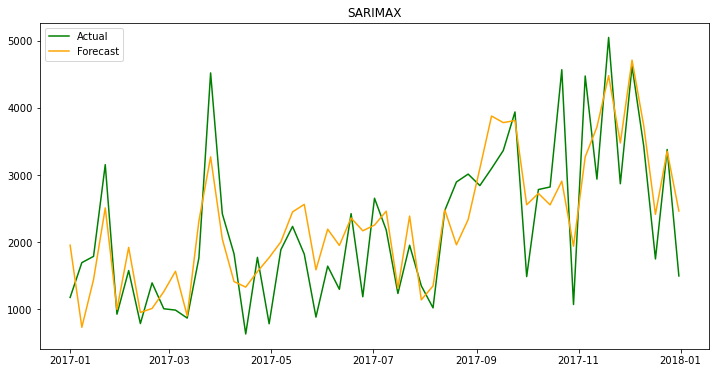

In [68]:
plt.figure(figsize=(12,6))
plt.plot(test["Sales"],label='Actual',c='green')
plt.plot(m4_forecast,label='Forecast',c='orange')
plt.title('SARIMAX')
plt.legend()
plt.show()

**<font color=crimson> Creating DataFrame for Comparision of Results**

In [69]:
compare = pd.DataFrame({'ERROR':[m1_rmse,m2_rmse,m3_rmse,m4_rmse],'AIC':[m1_aic,m2_aic,m3_aic,m4_aic],'BIC':[m1_bic,m2_bic,m3_bic,m4_bic]},index=['Exp Smoothing','ARMA','SARIMA','SARIMAX'])
compare

,ERROR,AIC,BIC
Exp Smoothing,2002.644,2299.774,2403.469
ARMA,1303.459,2605.316,2632.765
SARIMA,1670.391,2615.147,2654.795
SARIMAX,629.305,2457.374,2512.271


**<font color=crimson> Plotting Results**

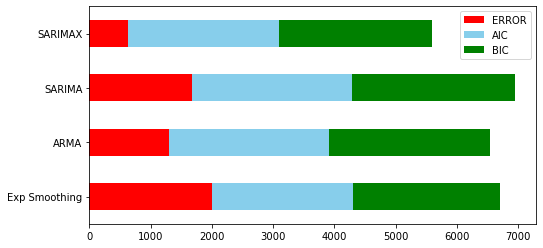

In [70]:
compare.plot( kind='barh', stacked=True,color=['red', 'skyblue', 'green'],figsize=(8,4))
plt.xticks(rotation=0)
plt.show()

* Based on the AIC, BIC and RMSE
* Sarimax is best Model for Forecasting the Data

## **<font color=crimson> Business Implications**

Sales of the All Categories have similar trend - 
* Sales of all categories were increasing in March and November of Every Year.
* Compared to all Categories Technology has more sales and there is an increase in sales 
* Furniture and Office Categories has low variance compared to Technology sales.

Sales of the All Segments have similar trend - 
* Sales of all Segments were increasing in March and November of Every Year.
* In Oct-2016 Consumer segment has least sales whereas other two segments has higher sales.
* In Jan-2015 there is an increase in Sales of Consumer Products where other two segments has least sales.